In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline
np.random.seed(1)

In [2]:
# #Take 100 examples with 2 features i.e. n[0] = 2    
# import nnfs
# from nnfs.datasets import spiral_data

# # Generating data set
# X, y = spiral_data(5000,2)   # 100 is the no of data point in each category and 3 is the no of category
# plt.scatter(X[:,0], X[:,1], c = y, cmap = "brg")
# plt.show()

In [3]:
# # data set 2
# dataset = np.loadtxt(r'C:\Users\msi 1\Downloads\heart_1.csv', delimiter=',',skiprows = 1)
# #print(dataset.shape)  

# X = dataset[:, :-1]
# y = dataset[:,-1]
# y = y.reshape(y.shape[0],1)

In [4]:
# # data set 3
# dataset = np.loadtxt(r'C:\Users\re824\Desktop\winequality-red.csv', delimiter=',',skiprows = 1)
# #print(dataset.shape)
# dataset[dataset[:,-1] < 5.5, -1] = 0
# dataset[dataset[:,-1] >= 5.5, -1] = 1   

# X = dataset[:, :-1]
# y = dataset[:,-1]
# y = y.reshape(y.shape[0],1)

In [5]:
# # Data Set 4
# from sklearn.datasets import make_moons
# X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
# plt.scatter(X[:,0], X[:,1], c = y, cmap = "brg")
# plt.show()
# #plot_data(X, y)

In [6]:
# # Data Set 5
# from sklearn.datasets import make_circles
# X, y = make_circles(n_samples=1000, noise=0.05, factor=0.3, random_state=0)
# plt.scatter(X[:,0], X[:,1], c = y, cmap = "brg")
# plt.show()

In [7]:
# data set 6
dataset = np.loadtxt(r'C:\Users\msi 1\Downloads\datas.csv', delimiter=',',skiprows = 1)
#print(dataset.shape)  

X = dataset[:, :-1]
y = dataset[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2, shuffle=True, stratify = y)
X = X.T
X_train = X_train.T
X_test = X_test.T
y = y.reshape(1,y.shape[0])
y_train = y_train.reshape(1,y_train.shape[0])
y_test = y_test.reshape(1,y_test.shape[0])

In [8]:
import sklearn
import sklearn.datasets
import sklearn.linear_model

# # train the logistic regression classifier
# data = sklearn.linear_model.LogisticRegressionCV()
# data.fit(X.T, y.T)

# plot_decision_boundary(lambda x:data.predict(x), X, y)


## Define neural network structure

In [9]:
def layer_size(X,y):
    n0 = X.shape[0]  # n_x of features
    n2 = y.shape[0]  # n_y is not output node
    return (n0, n2)

## Initializing all the parameters of layer 1 and layer 2

In [10]:
def initalization_parameters(n0, n1, n2): #  n_0, n_1 and n_2 are no of features or neuron in layer 0, 1,and 2 recp. 
    W1 = np.random.rand(n1,n0) * 0.01
    b1 = np.random.rand(n1,1)
    W2 = np.random.rand(n2,n1) * 0.01
    b2 = np.random.rand(n2,1)
    
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
    }
    
    return parameters

## Forward calculation

In [11]:
def forward_propogation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # layer 1 calculation
    Z1 = np.dot(W1,X) + b1  # size(w_1) = (n_1,n_0), size(X) = (n_0,m), size(b_1) = (n_1,1) where m = no of examples
    A1 = np.tanh(Z1)  # Activation function for layer 1

    # layer 2 calculation
    Z2 = np.dot(W2,A1) + b2  # size(w_2) = (n_2,n_1), size(A_1) = (n_1,m), size(b_1) = (n_2,1) where m = no of examples
    A2 = 1 / (1 + np.exp(-Z2))  # Activation function for layer 2, size(A_2) = (n_2,m)
       
    result = {
        "Z1" : Z1,
        "A1" : A1,
        "Z2" : Z2,
        "A2" : A2,
    }

    return A2, result

## Compute cost

In [12]:
def total_cost(A2, y): # output of layer2 by sigmoid function, y - true label
    m = y.shape[1]
    
    logprobs = np.multiply(np.log(A2), y) + np.multiply((1-y), np.log(1-A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost

## Backword Propogation

In [13]:
def backword_propogation(parameters, result, X, y):
    
    m = y.shape[1]
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = result["Z1"]
    A1 = result["A1"]
    Z2 = result["Z2"]
    A2 = result["A2"]
    
    dZ2 = A2 - y  # where y = actual output,  size(dZ_2) = (n_2,m) 
    dW2 = (1/m) * np.dot(dZ2,A1.T)   # size(dW_2) = (n_2,n_1)
    db2 = (1/m) * np.sum(dZ2, axis =1, keepdims = True)  # size(dB_2) = (n_2,1)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))   # np.vectorize(np.tanh)(Z1)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1, axis =1, keepdims = True)
    
    gradient = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2,
    }
    
    return gradient 

## Update parameters

In [14]:
def update_parameters(parameters, gradient, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = gradient["dW1"]
    db1 = gradient["db1"]
    dW2 = gradient["dW2"]
    db2 = gradient["db2"]
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1 
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2,
    }      
    
    return parameters

## Neural network code with one hidden layer 
#### Where n1 = no of nodes in that hidden layer

In [15]:
def nn_1_model(X, y, n1, n_iteration, learning_rate, print_cost):
    # Structue the model
    n0, n2 = layer_size(X,y)
    
    costs = []  # store the cost per iteration
    # Initialize the parameters
    parameters = initalization_parameters(n0, n1, n2)
    
    for i in range(n_iteration):
        # Forward propogation
        A2, result = forward_propogation(X, parameters)

        # Calculate loss or the total cost
        cost  = total_cost(A2, y)

        # Backword propogation or calculate the gradient
        gradient = backword_propogation(parameters, result, X, y)

        # Update the parameters
        parameters = update_parameters(parameters, gradient, learning_rate)
        
        # print the cost every 1000 iteration
        if print_cost and i % 100 == 0:
            #print("Cost after iteration %i: %f" %(i, cost))
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
            
    return parameters    

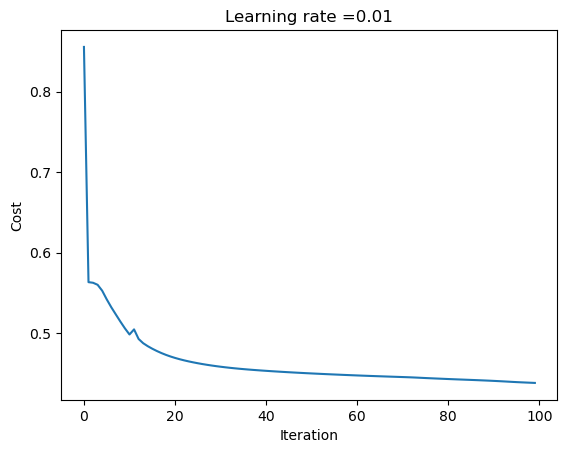

In [16]:
parameters = nn_1_model(X_train, y_train, n1 = 30, n_iteration = 10000, learning_rate = 0.01, print_cost = True)

## Prediction

In [17]:
def predict(parameters,X):
    A2, result = forward_propogation(X, parameters)
    predictions = A2 > 0.5
    return predictions*1

[[0. 1. 0. ... 0. 0. 1.]]
[[0 0 0 ... 0 0 0]]
[0. 1. 0. ... 0. 0. 1.]
[0 0 0 ... 0 0 0]


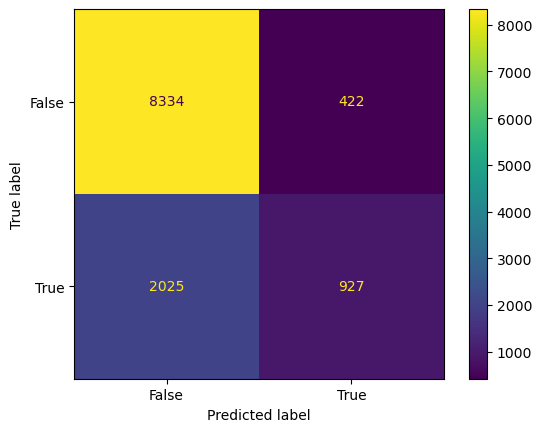

In [18]:
Y_P_train = predict(parameters, X_train)
print(y_train)
print(Y_P_train)
y1_train = y_train.flatten()
y1_p_train = Y_P_train.flatten()
print(y1_train)
print(y1_p_train)
confusion_matrix = metrics.confusion_matrix(y1_train, y1_p_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]]
[[0 0 0 ... 0 0 0]]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]


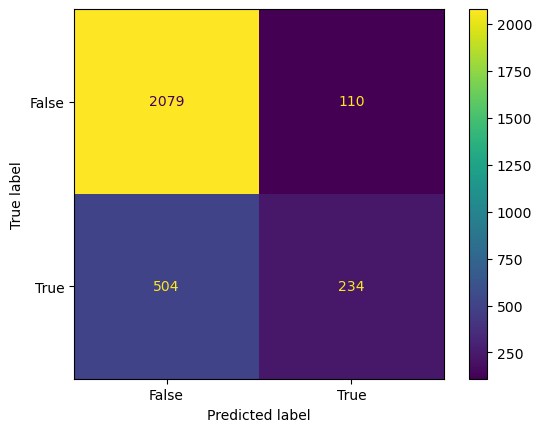

In [19]:
Y_P_test = predict(parameters, X_test)
print(y_test)
print(Y_P_test)
y1_test = y_test.flatten()
y1_p_test = Y_P_test.flatten()
print(y1_test)
print(y1_p_test)
confusion_matrix = metrics.confusion_matrix(y1_test, y1_p_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Tuning Hidden Layers

In [20]:
#hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]

# for i, n1 in enumerate(hidden_layer_sizes):
#     plt.figure(figsize = (16, 32))
#     plt.subplot(5, 2, i+1)
#     plt.title("Hidden Layer of size %d" % n1)
#     parameters = nn_1_model(X, y, n1, n_iteration = 50000, learning_rate = 0.1, print_cost = True)
#     plot_decision_boundary(lambda x : predict(parameters, x.T), X, y)
#     predictions = predict(parameters, X)
#     accuracy = float((np.dot(y, predictions.T) + np.dot(1-y, 1-predictions.T))/float(y.size)*100)
#     print("Accuracy for {} hidden units: {} %".format(n1, accuracy))
    